In [1]:
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2
from tensorflow.keras.utils import to_categorical


# image dimensions (based on dataset image sizes)
img_height = 224
img_width = 224

In [2]:
import os


# base directory
base_dir = 'Datasets/hand-drawn-shapes/'

# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')
val_dir = os.path.join(base_dir, 'val')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating train, test, and val sets

# first create data generators
# All images will be rescaled by 1./255, and randomization factors will be applied to help avoid overfitting
train_datagen = ImageDataGenerator(
        rotation_range=20,          # Random rotation
        width_shift_range=0.2,      # Horizontal shifts
        height_shift_range=0.2,     # Vertical shifts
        shear_range=0.2,            # Shearing transformations
        zoom_range=0.2,             # Random zoom
        horizontal_flip=True,       # Horizontal flipping
        rescale=1./255)
test_datagen = ImageDataGenerator(
        rotation_range=20,          
        width_shift_range=0.2,      
        height_shift_range=0.2,     
        shear_range=0.2,           
        zoom_range=0.2,            
        horizontal_flip=True,      
        rescale=1./255)

val_datagen = ImageDataGenerator(
        rotation_range=20,          
        width_shift_range=0.2,      
        height_shift_range=0.2,    
        shear_range=0.2,           
        zoom_range=0.2,            
        horizontal_flip=True,      
        rescale=1./255)


# create generator sets with batch sizes of 20
# resize images if necessary
train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized
        target_size=(img_height, img_width),
        batch_size=20,
        class_mode='categorical', 
        )

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=20,
        class_mode='categorical',
        )

val_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_height, img_width),
        batch_size=20,
        class_mode='categorical',
        )

Found 4500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [5]:
# displaying data contents
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

for data_batch, labels_batch in test_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

for data_batch, labels_batch in val_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 3)
data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 3)
data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 3)


In [6]:
# Building the model

from tensorflow.keras.layers import BatchNormalization, Activation

# batch normalization used to avoid exploding gradients (issue we were having)

model = Sequential([
    Conv2D(64, (3,3), activation=None, input_shape=(img_height, img_width, 3)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, (3,3), activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation=None),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(256, activation=None),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

/Users/nicholasconroy/cvtest/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-12-09 21:05:02.117581: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-12-09 21:05:02.117619: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-12-09 21:05:02.117623: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-12-09 21:05:02.118143: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-12-09 21:05:02.118160: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.

In [7]:
# use categorical_crossentropy as loss function due to model being multiclass
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,437,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 9,849,027 (37.57 MB)

 Trainable params: 9,847,491 (37.57 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [9]:
epochs=10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs, 
    steps_per_epoch=100, #need the steps per epoch or the generators will continue looping data forever
    validation_steps=50
)

/Users/nicholasconroy/cvtest/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2024-12-09 21:05:03.630709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 492ms/step - accuracy: 0.4247 - loss: 1.5112 - val_accuracy: 0.3280 - val_loss: 1.5077
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 447ms/step - accuracy: 0.6854 - loss: 0.7475 - val_accuracy: 0.3220 - val_loss: 1.8202
Epoch 3/10
 25/100 ━━━━━━━━━━━━━━━━━━━━ 32s 428ms/step - accuracy: 0.8300 - loss: 0.4373

/Users/nicholasconroy/cvtest/lib/python3.10/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 165ms/step - accuracy: 0.8255 - loss: 0.4500 - val_accuracy: 0.3320 - val_loss: 1.6725
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 439ms/step - accuracy: 0.8371 - loss: 0.4178 - val_accuracy: 0.3620 - val_loss: 1.7969
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 44s 442ms/step - accuracy: 0.8580 - loss: 0.3467 - val_accuracy: 0.4720 - val_loss: 1.2697
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 153ms/step - accuracy: 0.8987 - loss: 0.3149 - val_accuracy: 0.8150 - val_loss: 0.4576
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 517ms/step - accuracy: 0.9062 - loss: 0.2749 - val_accuracy: 0.3660 - val_loss: 2.3026
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 468ms/step - accuracy: 0.8992 - loss: 0.2541 - val_accuracy: 0.9230 - val_loss: 0.2348
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 17s 169ms/step - accuracy: 0.9222 - loss: 0.2300 - val_accuracy: 0.8120 - val_loss: 0.4711
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 549ms/step - accuracy: 0.9263 - loss: 0.2105 - va

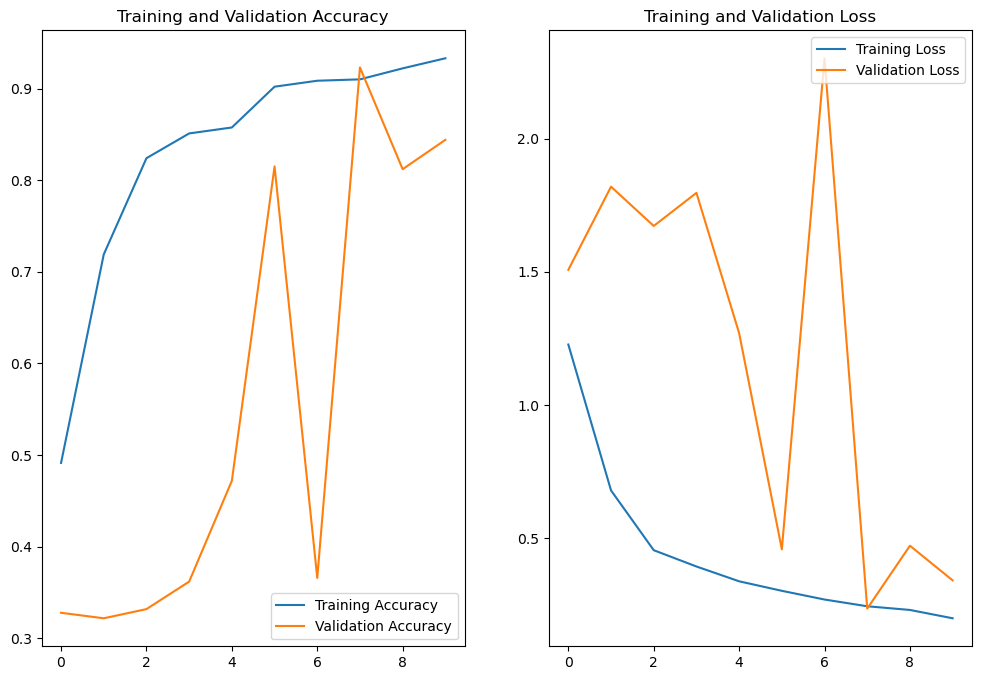

In [10]:
# Plot the training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Evaluate Model

In [11]:
# Evaluate using the train data
train_loss, train_acc = model.evaluate(train_generator, verbose=2)
print(f'Train accuracy: {train_acc:.2f}')

225/225 - 32s - 141ms/step - accuracy: 0.8362 - loss: 0.3658
Train accuracy: 0.84


In [12]:
# Evaluate using the test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

75/75 - 10s - 139ms/step - accuracy: 0.8473 - loss: 0.3476
Test accuracy: 0.85


In [13]:
# create labels from test generator for confuion matrix analysis

test_generator.reset() # Reset the generator to start from the first batch
rounded_labels = []
for i in range(len(test_generator)):  # get all batches (195 images in total)
    images, labels = next(test_generator)
    for label in labels:
        rounded_labels.append(np.argmax(label)) # get label from array
print(rounded_labels)

[2, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 2, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 0, 0, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 2, 1, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 1, 

75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 123ms/step
[1 1 1 ... 2 1 2]


<Axes: >

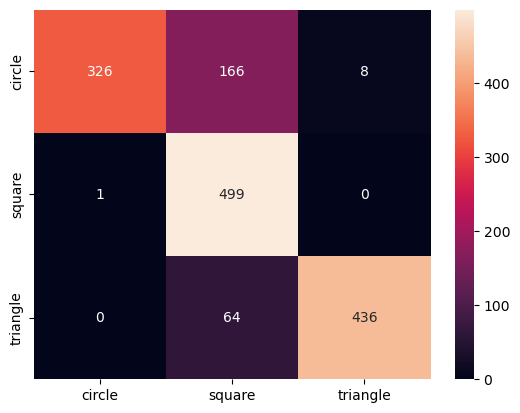

In [14]:
# Generate the confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

test_generator.reset()  # Reset the generator to start from the first batch


# Predict the classes of the test set
#model.predict gives us an array of probabilities for our categories
predictions = model.predict(test_generator)

# get categories from predictions
predicted_categories = np.argmax(predictions, axis=1)
print(predicted_categories)

# cf matrix labels
shapes_list = os.listdir("Datasets/hand-drawn-shapes/train")

shapes_list.remove('.DS_Store')

targets = sorted(shapes_list)

# create the matrix
conf_matrix = confusion_matrix(rounded_labels, predicted_categories)
#display the matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=targets, yticklabels=targets)

In [16]:
# Function to classify a new image
def classify_image(model, image_path):
    img = load_img(image_path, target_size=(img_height, img_width))
    
    img_array = img_to_array(img) / 255.0 #Normalize the image
    
    # apply threshold to image for easier image recognition
    threshold = 0.5
    img_array[img_array < threshold] = 0 #all img elements less than threshold equal to 0, rest equal to 1
    img_array[img_array >= threshold] = 1
    
    img_array = tf.expand_dims(img_array, 0) #Create a batch
    prediction = model.predict(img_array)
    # get the predicted cateogry from the prediction array 
    prediction = np.argmax(prediction)
    
    if prediction == 0:
        print("This is a circle!")
    elif prediction == 1:
        print("This is a square.")
    else:
        print("This is a triangle")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
This is a triangle


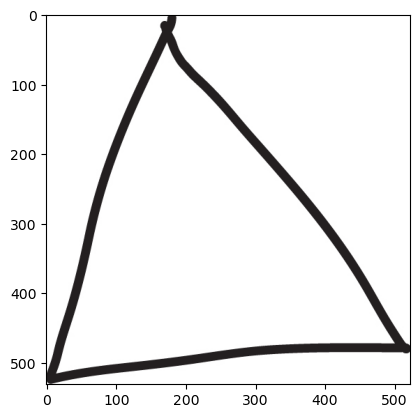

In [17]:
#testing a few new images
img_path = "images/test images/triangle.jpg"

classify_image(model, img_path)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
This is a square.


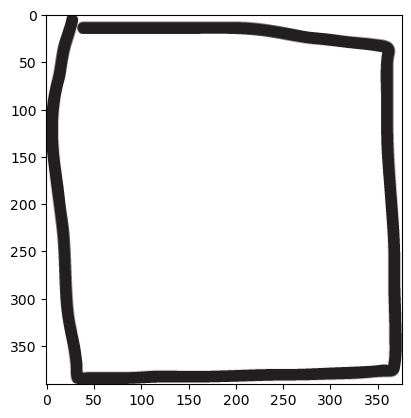

In [18]:
img_path = "images/test images/square.jpg"

classify_image(model, img_path)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
This is a square.


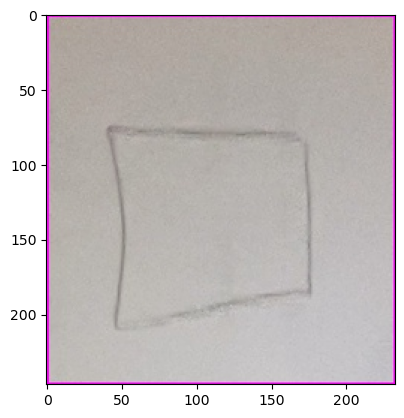

In [19]:
img_path = "images/new_img2.jpg"

classify_image(model, img_path)

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [20]:
# save model 
from tensorflow import keras

model.save('./multiclass_shapes.keras')